In [ ]:
##https://github.com/nxs5899/Multi-Class-Text-Classification----Random-Forest/blob/master/multi-class-classifier.ipynb

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kumarsanjeev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#path= "/Users/KumarSanjeev/Desktop/Training Data/spam.csv"
path= "/Users/KumarSanjeev/Desktop/Training Data/stack-overflow-data.csv"


In [3]:
import pandas as pd
data=pd.read_csv(path,encoding='latin-1')

In [4]:
data.head()

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [8]:
#data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [ ]:
data

In [ ]:
# data.groupby("v1").v2.count().plot.bar(ylim=0)
# plt.show()

In [ ]:
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
data['cleaned'] = data['v2'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [6]:
data

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python
...,...,...
39995,different output if at end of function rather ...,c++
39996,multiple arrays is there a way to access/stor...,iphone
39997,c - how to differentiate a second same key pre...,c
39998,state.go not working (#! & url is being append...,angularjs


In [9]:
X=data["post"]
y=data["tags"]

In [11]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(data['post']).toarray()
final_features.shape


(40000, 165790)

In [12]:
# this block is to split the dataset into training and testing set 
X = data['post']
Y = data['tags']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# instead of doing these steps one at a time, we can use a pipeline to complete then all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])

# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


               precision    recall  f1-score   support

         .net       0.58      0.67      0.62       487
      android       0.89      0.87      0.88       507
    angularjs       0.97      0.97      0.97       516
      asp.net       0.74      0.72      0.73       500
            c       0.76      0.85      0.81       510
           c#       0.58      0.59      0.58       502
          c++       0.76      0.73      0.75       499
          css       0.79      0.83      0.81       499
         html       0.66      0.64      0.65       520
          ios       0.58      0.60      0.59       493
       iphone       0.63      0.57      0.60       501
         java       0.87      0.80      0.83       488
   javascript       0.77      0.76      0.76       490
       jquery       0.84      0.87      0.86       515
        mysql       0.79      0.84      0.81       511
  objective-c       0.66      0.65      0.66       498
          php       0.86      0.84      0.85       474
       py

In [10]:
print("importing libraries.....")


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D,MaxPool1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


importing libraries.....


/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Text(0.5, 0, 'numbers')

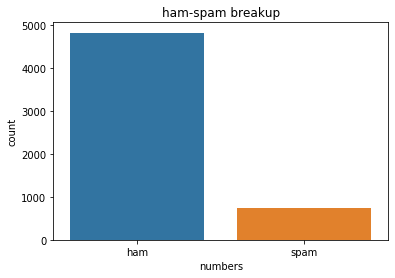

In [11]:
sns.countplot(y)
plt.title("ham-spam breakup")
plt.xlabel("numbers")

In [12]:
le= LabelEncoder()

In [13]:
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
y.reshape(-1,1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [15]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [16]:
len(X_test),len(y_test)

(836, 836)

In [17]:
"""
Tokenize the data and convert the text to sequences.
Add padding to ensure that all the sequences have the same shape.
There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.
"""


'\nTokenize the data and convert the text to sequences.\nAdd padding to ensure that all the sequences have the same shape.\nThere are many ways of taking the max_len and here an arbitrary length of 150 is chosen.\n'

In [18]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)

In [19]:
print(tok)

In [20]:
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [21]:
sequences_matrix

array([[  0,   0,   0, ...,   0,  47, 351],
       [  0,   0,   0, ...,  20,  14,   9],
       [  0,   0,   0, ...,   2,  27, 130],
       ...,
       [  0,   0,   0, ..., 384, 242, 809],
       [  0,   0,   0, ..., 728,  79, 411],
       [  0,   0,   0, ...,  94, 670,   2]], dtype=int32)

# Option1

In [22]:
# model = Sequential()
# model.add(Embedding(max_words,100, input_length=max_len))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D,MaxPool1D

# Option2: Embedding Layer

In [24]:
# import keras
# model = Sequential()
# model.add(keras.layers.Embedding(input_dim = max_words, 
#                            output_dim=100, 
#                            input_length=max_len))
# model.add(keras.layers.GlobalMaxPool1D())
# model.add(keras.layers.Dense(10, activation='relu'))
# model.add(keras.layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 100)          100000    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 101,021
Trainable params: 101,021
Non-trainable params: 0
_________________________________________________________________


# Option3: Adding CNN Layer

In [ ]:
# import keras
# model = Sequential()
# model.add(keras.layers.Embedding(input_dim = max_words, 
#                            output_dim=100, 
#                            input_length=max_len))
# model.add(keras.layers.GlobalMaxPool1D())
# model.add(keras.layers.Dense(10, activation='relu'))
# model.add(keras.layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

In [28]:
import keras
embedding_dim = 100

model = Sequential()
model.add(keras.layers.Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(keras.layers.Conv1D(128, 5, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 100)          100000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 146, 128)          64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 165,429
Trainable params: 165,429
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 3s 843us/step - loss: 0.4488 - acc: 0.8683 - val_loss: 0.3698 - val_acc: 0.8639
Epoch 2/10
3788/3788 [==============================] - 3s 709us/step - loss: 0.2807 - acc: 0.8823 - val_loss: 0.1622 - val_acc: 0.9589
Epoch 3/10
3788/3788 [==============================] - 3s 684us/step - loss: 0.0864 - acc: 0.9794 - val_loss: 0.0572 - val_acc: 0.9884
Epoch 4/10
3788/3788 [==============================] - 3s 664us/step - loss: 0.0363 - acc: 0.9905 - val_loss: 0.0489 - val_acc: 0.9873
Epoch 5/10
3788/3788 [==============================] - 3s 674us/step - loss: 0.0226 - acc: 0.9947 - val_loss: 0.0454 - val_acc: 0.9905
Epoch 6/10
3788/3788 [==============================] - 3s 667us/step - loss: 0.0152 - acc: 0.9963 - val_loss: 0.0437 - val_acc: 0.9905
Epoch 7/10
3788/3788 [==============================] - 3s 671us/step - loss: 0.0095 - acc: 0.9987 - val_loss: 0.0432 - val_acc: 0.9905
E

In [30]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [31]:
accr = model.evaluate(test_sequences_matrix,y_test)
accr

836/836 [==============================] - 0s 211us/step


[0.040595826639406134, 0.9904306220095693]

In [32]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.041
  Accuracy: 0.990


# Rough Work

In [33]:
e = Embedding(200, 32, input_length=50)

In [68]:
from numpy import array
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])

In [110]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[32, 2], [41, 39], [16, 48], [46, 39], [16], [13], [12, 48], [26, 41], [12, 39], [11, 36, 2, 1]]


In [111]:
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length,padding='post')
print(padded_docs)

[[32  2  0  0]
 [41 39  0  0]
 [16 48  0  0]
 [46 39  0  0]
 [16  0  0  0]
 [13  0  0  0]
 [12 48  0  0]
 [26 41  0  0]
 [12 39  0  0]
 [11 36  2  1]]


In [112]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [113]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [114]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [115]:
model.fit(padded_docs,labels,epochs=45,verbose=1)

Epoch 1/45
10/10 [==============================] - 0s 22ms/step - loss: 0.6894 - acc: 0.8000
Epoch 2/45
10/10 [==============================] - 0s 173us/step - loss: 0.6882 - acc: 0.8000
Epoch 3/45
10/10 [==============================] - 0s 170us/step - loss: 0.6869 - acc: 0.8000
Epoch 4/45
10/10 [==============================] - 0s 149us/step - loss: 0.6857 - acc: 0.8000
Epoch 5/45
10/10 [==============================] - 0s 148us/step - loss: 0.6845 - acc: 0.8000
Epoch 6/45
10/10 [==============================] - 0s 143us/step - loss: 0.6833 - acc: 0.8000
Epoch 7/45
10/10 [==============================] - 0s 127us/step - loss: 0.6820 - acc: 0.8000
Epoch 8/45
10/10 [==============================] - 0s 142us/step - loss: 0.6808 - acc: 0.8000
Epoch 9/45
10/10 [==============================] - 0s 137us/step - loss: 0.6795 - acc: 0.9000
Epoch 10/45
10/10 [==============================] - 0s 174us/step - loss: 0.6783 - acc: 0.9000
Epoch 11/45
10/10 [==============================]

In [108]:
loss,accuracy=model.evaluate(padded_docs,labels,verbose=0)

In [109]:
accuracy

1.0

In [60]:
num=51
a=0
b=1

for i in range(0,num):
    c=a+b
    a=b

toxicGET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP.  I'M FUCKED UP RIGHT NOW!


In [64]:
print("toxic:  " + data["comment_text"][51])

toxic:  GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP.  I'M FUCKED UP RIGHT NOW!
